# Random Forest

Removed Stop Words and with Stemming

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv ('dataset.csv') v#
df_target = df['humor']
df_data = df.copy()
df_data.drop(columns='humor')

df_target.head()

0    False
1    False
2     True
3    False
4    False
Name: humor, dtype: bool

In [2]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_target = label_encoder.fit_transform(df_target)
df_target

array([0, 0, 1, ..., 1, 0, 1])

In [3]:
#preproccesing with tfidf vectorizer and removing stop words

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=False, stop_words='english',min_df=0.00009)


matrix = tfidfVectorizer.fit_transform(df_data['text'])

df_data_tfidfVectorized = pd.DataFrame(matrix.toarray(), columns=tfidfVectorizer.get_feature_names())
display(df_data_tfidfVectorized)

,00,000,0k,10,100,1000,101,10th,11,12,...,zimmerman,zinke,zipper,zoe,zombie,zombies,zone,zones,zoo,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string

nltk.download('stopwords')

#definition of stemming function
token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace

def tokenize(text):
    my_stopwords = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    stems = []
    
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joyceren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
stem_vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.0015)
matrix = stem_vectorizer.fit_transform(df_data['text'])

df_data_stemmed = pd.DataFrame(matrix.toarray(), columns=stem_vectorizer.get_feature_names())
display(df_data_stemmed)

,000,10,100,11,12,13,14,15,20,2012,...,would,write,wrong,ye,year,yesterday,yet,yo,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

df_data_train, df_data_test, df_target_train, df_target_test = train_test_split(
    df_data_stemmed, df_target, test_size=0.2, random_state=42)

#It starts working with a max depth of 3
random_forest = RandomForestClassifier(max_depth=3, n_jobs = 1, random_state=0, oob_score = True)

#get the start time
start_time_wall = time.time()
start_time_cpu = time.process_time()

random_forest.fit(df_data_train, df_target_train)

#get the end time
end_time_wall = time.time()
end_time_cpu = time.process_time()

#print runtime in seconds

Wall_time = end_time_wall - start_time_wall
CPU_time = end_time_cpu - start_time_cpu

print ('Wall time = ', Wall_time)
print ('CPU time = ', CPU_time)

#oob score
random_forest.oob_score_

Wall time =  16.243277072906494
CPU time =  15.735921000000005


0.68174375

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_prediction = random_forest.predict(df_data_test)
print("Accuracy: {}".format(accuracy_score(df_target_test, df_prediction)))

Accuracy: 0.73355


In [8]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

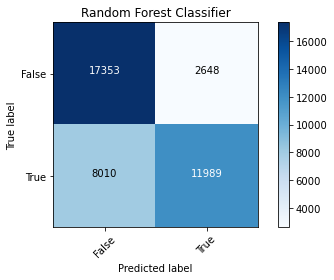

In [9]:
#print("Confusion Matrix:")
cnf_matrix = confusion_matrix(df_target_test, df_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Random Forest Classifier')

In [10]:
#hyperparameter tuning using gridsearch
#based on these result we run the random forest algorithm once again with the resulted parameters
#afterwards we could observe that the higher the depth was, the higher the accuracy was as well, but the runtime increased
#min_samples_lead optimum was at 5
rf = RandomForestClassifier(random_state=0, n_jobs=1)

params = {
    'max_depth': [3,5,10,20,50],
    'min_samples_leaf': [5, 10, 20, 30, 50],
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv = 5,
                          n_jobs = 1, verbose = 1, scoring = "accuracy")

#get the start time
start_time_wall = time.time()
start_time_cpu = time.process_time()

grid_search.fit(df_data_train, df_target_train)

#get the end time
end_time_wall = time.time()
end_time_cpu = time.process_time()

#print runtime in seconds

Wall_time = end_time_wall - start_time_wall
CPU_time = end_time_cpu - start_time_cpu

print ('Wall time = ', Wall_time)
print ('CPU time = ', CPU_time)

grid_search.best_score_

random_forest_best = grid_search.best_estimator_
random_forest_best

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wall time =  6819.487743854523
CPU time =  3268.600891


RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_jobs=1,
                       random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

df_data_train, df_data_test, df_target_train, df_target_test = train_test_split(
    df_data_stemmed, df_target, test_size=0.2, random_state=42)


random_forest = RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_jobs = 1, random_state=0, oob_score = True)

#get the start time
start_time_wall = time.time()
start_time_cpu = time.process_time()

random_forest.fit(df_data_train, df_target_train)

#get the end time
end_time_wall = time.time()
end_time_cpu = time.process_time()

#print runtime in seconds

Wall_time = end_time_wall - start_time_wall
CPU_time = end_time_cpu - start_time_cpu

print ('Wall time = ', Wall_time)
print ('CPU time = ', CPU_time)

#oob score
random_forest.oob_score_

Wall time =  95.04124784469604
CPU time =  94.27740700000004


0.763575

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_prediction = random_forest.predict(df_data_test)
print("Accuracy: {}".format(accuracy_score(df_target_test, df_prediction)))

Accuracy: 0.7675


In [17]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

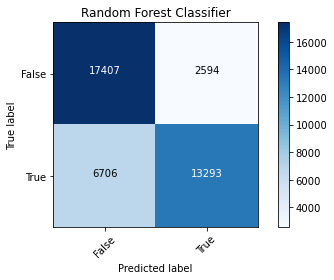

In [18]:
#print("Confusion Matrix:")
cnf_matrix = confusion_matrix(df_target_test, df_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Random Forest Classifier')

In [19]:
rf = RandomForestClassifier(random_state=0, n_jobs=1)

params = {
    'max_depth': [50,100,200,300,500],
    'min_samples_leaf': [5, 10, 20, 30, 50],
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv = 5,
                          n_jobs = 1, verbose = 1, scoring = "accuracy")

#get the start time
start_time_wall = time.time()
start_time_cpu = time.process_time()

grid_search.fit(df_data_train, df_target_train)

#get the end time
end_time_wall = time.time()
end_time_cpu = time.process_time()

#print runtime in seconds

Wall_time = end_time_wall - start_time_wall
CPU_time = end_time_cpu - start_time_cpu

print ('Wall time = ', Wall_time)
print ('CPU time = ', CPU_time)

grid_search.best_score_

random_forest_best = grid_search.best_estimator_
random_forest_best

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wall time =  15921.480849981308
CPU time =  15816.524046999999


RandomForestClassifier(max_depth=500, min_samples_leaf=5, n_jobs=1,
                       random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

df_data_train, df_data_test, df_target_train, df_target_test = train_test_split(
    df_data_stemmed, df_target, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(max_depth=500, min_samples_leaf=5, n_jobs = 1, random_state=0, oob_score = True)

#get the start time
start_time_wall = time.time()
start_time_cpu = time.process_time()

random_forest.fit(df_data_train, df_target_train)

#get the end time
end_time_wall = time.time()
end_time_cpu = time.process_time()

#print runtime in seconds

Wall_time = end_time_wall - start_time_wall
CPU_time = end_time_cpu - start_time_cpu

print ('Wall time = ', Wall_time)
print ('CPU time = ', CPU_time)

#oob score
random_forest.oob_score_

Wall time =  251.52769994735718
CPU time =  250.91282099999808


0.81594375

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_prediction = random_forest.predict(df_data_test)
print("Accuracy: {}".format(accuracy_score(df_target_test, df_prediction)))

Accuracy: 0.82415


In [22]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

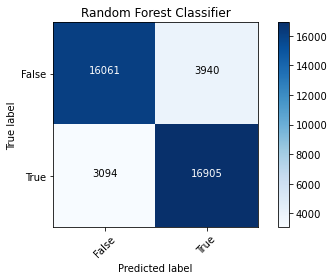

In [23]:
#print("Confusion Matrix:")
cnf_matrix = confusion_matrix(df_target_test, df_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Random Forest Classifier')

In [ ]:
#Optmized min samples leaf is at 5. 